<a href="https://colab.research.google.com/github/umutZeren/Neural_Net_numpy-/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random

In [ ]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [ ]:
def sigmoid_derivative(z):
    return z * (1.0 - z)

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [ ]:
X=iris.data
y=iris.target

In [ ]:
from numpy.random import permutation
perm = permutation(len(X))
X=X[perm]
y=y[perm]
X_train=X[:100]
X_test=X[101:126]
X_validation=X[126:151]
y_train=y[:100]
y_test=y[101:126]
y_validation=y[126:151]

In [ ]:
class NeuralNetwork:
    def __init__(self, inSize, sl2,clsSize, lrt): 
        # Constructor expects:
        # inSize- input size, number of features
        # sl2 - number of neurons in the hidden layer
        # clsSize - number of classes, equals number of neurons in output layer
        # lrt - learning rate
      
    
        self.iSz=inSize
        self.oSz=clsSize
        self.hSz=sl2
        # Initial assignment of weights 
        np.random.seed(42) ## assigning seed so it generates the same random number all the time. Just to fix the result.
        self.weights1   = (np.random.rand(self.hSz,self.iSz)-0.5)/np.sqrt(self.iSz) 
        self.weights2   = (np.random.rand(self.oSz,self.hSz)-0.5)/np.sqrt(self.hSz) 

        self.output=np.zeros(clsSize)
        
        self.layer1=np.zeros(self.hSz)
        self.eta=lrt
                
        
        # this function send forward single sample
    def feedforward(self, x):
        x=np.expand_dims(x, axis=1)
        self.layer1=sigmoid(np.dot(self.weights1,x))
        self.output=sigmoid(np.dot(self.weights2,self.layer1))

        ## Fill this function
        
        

        # this function backpropagates errors of single sample
    def backprop(self,x, trg):
        m=len(x)
        trg=np.expand_dims(trg, axis=1)
        dz2=(trg-self.output)
        delta2= (1/m) * np.dot(dz2,self.layer1.T)
        dz1= np.dot(self.weights2.T,dz2)* sigmoid_derivative(self.layer1)
        x=np.expand_dims(x, axis=1)
        delta1=(1/m) * np.dot(dz1,x.T) 
        ## Fill this function
       
    
        return delta1,delta2
    
    # This function is called for training the data
    
    def fit(self,X,y,iterNo):
        
        m=np.shape(X)[0]
      
        for i in range(iterNo):
            D1=np.zeros(np.shape(self.weights1))
            D2=np.zeros(np.shape(self.weights2))
            #new_error=0
            for j in range(m):
                self.feedforward(X[j])
                yt=np.zeros(self.oSz)
                yt[int(y[j])]=1                 # the output is converted to vector, so if class of a sample is 1, then yt=[0 1 0]
                [delta1,delta2]= self.backprop(X[j],yt)
                D1=D1+delta1
                D2=D2+delta2
            self.weights1= self.weights1+self.eta*(D1/m) # weights1 are updated only ones after one epoch
            self.weights2=self.weights2+self.eta*(D2/m)  # weights2 are updated only ones after one epoch
          
    # This function is called for prediction
        
    def predict(self,X):
        m=np.shape(X)[0]
        y_proba=np.zeros((m,3))
        y=np.zeros(m)
        

        for i in range(m):
            self.feedforward(X[i])
            y_proba[i,:]=np.squeeze(self.output)   # the outputs of the network are the probabilities
            #y_proba[i]=self.output
            y[i]=np.argmax(self.output) # here we convert the probabilities to classes
        return y, y_proba
        

In [ ]:
def accuracy(y_pred,yreal):
  acc=0
  for i,j  in zip(y_pred,yreal):
    if i==j: acc+=1
  return acc

shape is (2, 4)
shape is (3, 2)
shape is (2, 4)
shape is (3, 2)
shape is (2, 4)
shape is (3, 2)


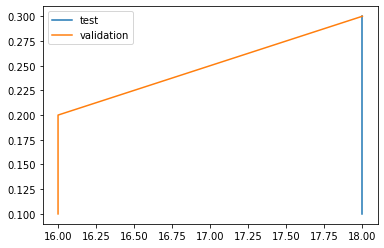

In [ ]:
def train_and_res(hidden,eta,iternu=1000):
  nn=NeuralNetwork(4,hidden,3,eta)
  nn.fit(X_train,y[:100],iternu)
  y_predt,yp_predt=nn.predict(X_test)
  y_predv,yp_predv=nn.predict(X_validation)
  rt=accuracy(y_predt,y_test)
  rv=accuracy(y_predv,y_validation)
  return rt,rv
res_test=[]
res_val=[]
etas=[0.1,0.2,0.3]
for i in etas:
  test,val=(train_and_res(2,i))
  res_test.append(test)
  res_val.append(val)

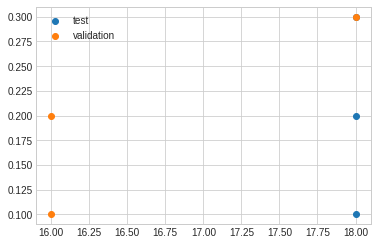

In [ ]:
plt.scatter(res_test,etas,label='test')
plt.scatter(res_val,etas,label='validation')
plt.legend()

In [ ]:
res_test,res_val # for eta =0.1 0.2 0.3 respectively part 2_a

([18, 18, 18], [16, 16, 18])

In [ ]:
hidden=[2,3,4]
res_test_hidden=[]
rest_val_hidden=[]
for i in hidden:
  test,val=(train_and_res(i,0.2,iternu=500))
  res_test_hidden.append(test)
  rest_val_hidden.append(val)

shape is (2, 4)
shape is (3, 2)
shape is (3, 4)
shape is (3, 3)
shape is (4, 4)
shape is (3, 4)


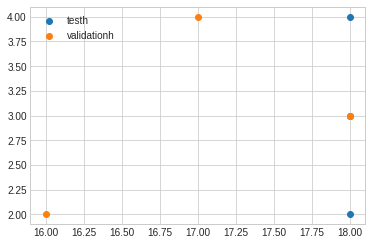

In [ ]:
plt.scatter(res_test_hidden,hidden,label='testh')
plt.scatter(rest_val_hidden,hidden,label='validationh')
plt.legend()

In [ ]:
res_test_hidden,rest_val_hidden

([18, 18, 18], [16, 18, 17])

In [ ]:
from sklearn.metrics import confusion_matrix
X_new = np.concatenate((X_train,X_validation))
y_new = np.concatenate((y_train,y_validation))
nn=NeuralNetwork(4,3,3,0.2)
nn.fit(X_new,y_new,700)
ypre,ypo=nn.predict(X_test)
test=accuracy(ypre,y_test)
print("acc",test)
print("confusion matrix\n",confusion_matrix(y_test, ypre))


shape is (3, 4)
shape is (3, 3)
acc 20
confusion matrix
 [[ 7  0  0]
 [ 0  2  5]
 [ 0  0 11]]


(496,)

In [ ]:
nn=NeuralNetwork(4,4,3,0.3)
nn.fit(X_new,y_new,1000)
ypre,ypo=nn.predict(X_test)
test=accuracy(ypre,y_test)

array([5.8, 2.7, 5.1, 1.9])